## Network Science Assignment 2 (HS22)

David Diener 19-733-179


Rafael Dubach 18-755-180

In [2]:
import math as m
import numpy as np
import matplotlib.pyplot as plt 
import networkx as nx
import os as os
import regex as re
from IPython.display import display, Markdown
from networkx.algorithms.smallworld import random_reference

from google.colab import drive
drive.mount('/content/drive')
terrorist_n = nx.read_gml("/content/drive/MyDrive/Colab Notebooks/Exercise_2/All/graph_terrorists.gml")
terrorist_r = nx.read_gml("/content/drive/MyDrive/Colab Notebooks/Exercise_2/All/graph_terrorists_random.gml")

Mounted at /content/drive


# A02.1 Average degree of the nearest neighbours

In [2]:
from networkx.algorithms.assortativity.connectivity import average_degree_connectivity

def avg_degree_nn(normal: nx.Graph, randomized: nx.Graph, name):
  n = nx.degree_assortativity_coefficient(normal)
  r = nx.degree_assortativity_coefficient(randomized)
  """
  We used the given randomized dataset, as it was way to slow to randomize every set by our own.
  Code to randomize is alos commented out.
  r = random_reference(normal, connectivity=False)
  """ 
  t_n = (list(average_degree_connectivity(normal).keys()),list(average_degree_connectivity(normal).values()))
  t_r = (list(average_degree_connectivity(randomized).keys()),list(average_degree_connectivity(randomized).values()))
  
  plt.rcParams['figure.dpi'] = 120
  plt.rcParams['savefig.dpi'] = 120
  
  plt.scatter(t_n[0],t_n[1], label="original", color="#00203FFF")
  plt.scatter(t_r[0],t_r[1], label="random", color="#ADEFD1FF")
  plt.title("knn(k) average degree " + re.split('_*_', name)[1])
  plt.xlabel("degree k")
  plt.ylabel("degree knn")
  plt.legend()
  display(Markdown(f"#{re.split('_*_', name)[1]}"))
  plt.show()
  return "\n"+f"assortativity coefficient of the normal network: {n}" + "\n" + f"assortativity coefficient of the randomised network: {r}"

#AstroPh

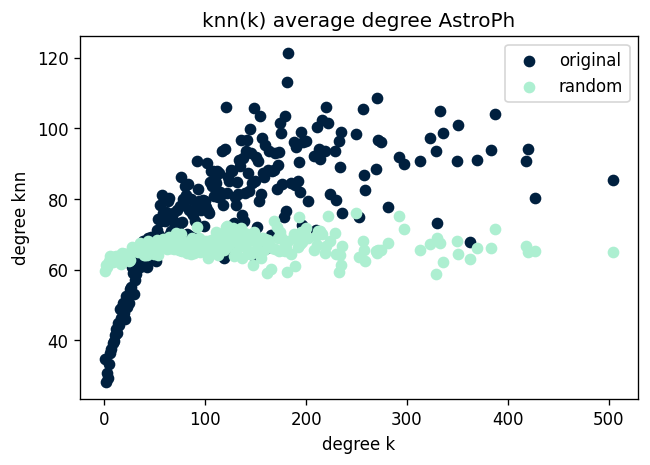


assortativity coefficient of the normal network: 0.20131706127372678
assortativity coefficient of the randomised network: 0.016786718783262843


#CondMat

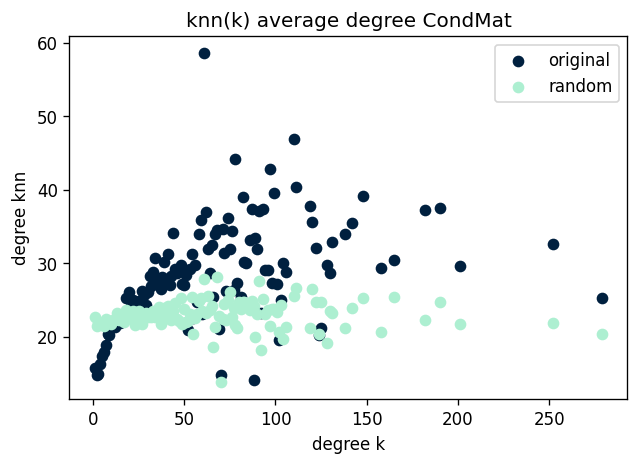


assortativity coefficient of the normal network: 0.12528250398544855
assortativity coefficient of the randomised network: 0.010626136622392294


#celegansInteractomes

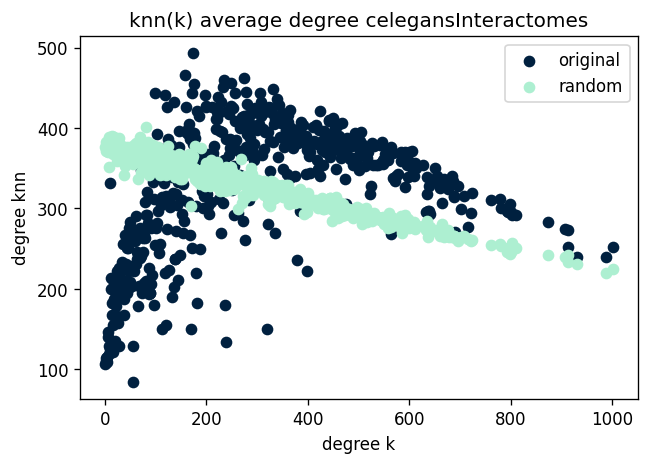


assortativity coefficient of the normal network: 0.15169796960230705
assortativity coefficient of the randomised network: -0.16041270078807657


#chess

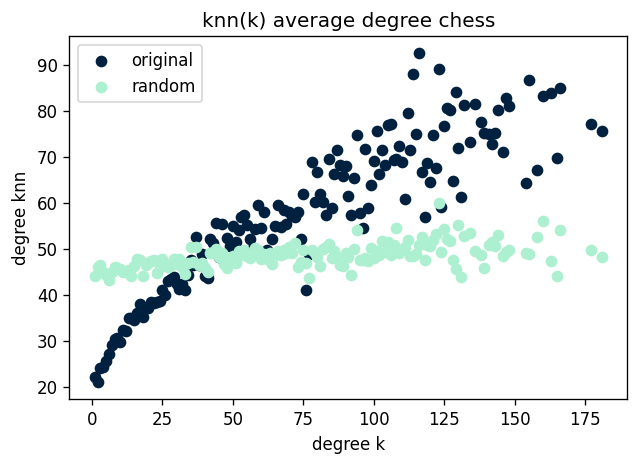


assortativity coefficient of the normal network: 0.3705153782729769
assortativity coefficient of the randomised network: 0.040416830465474146


#dolphins

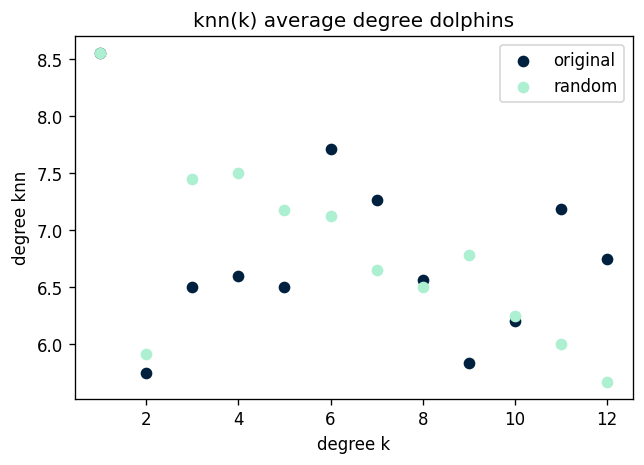


assortativity coefficient of the normal network: -0.04359402821531255
assortativity coefficient of the randomised network: -0.1559676756608678


#eu

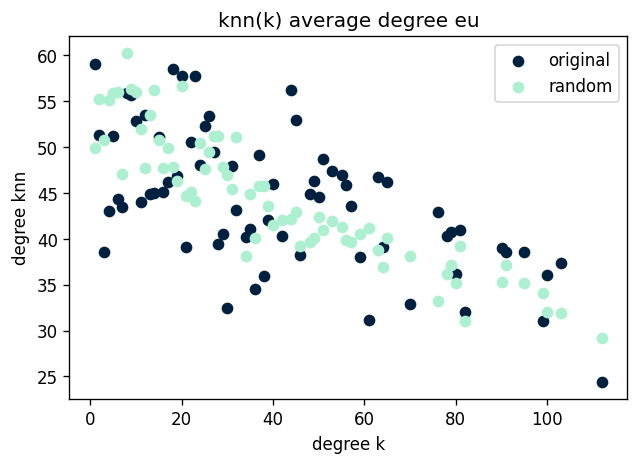


assortativity coefficient of the normal network: -0.15180413274193835
assortativity coefficient of the randomised network: -0.2239276234409445


#facebook

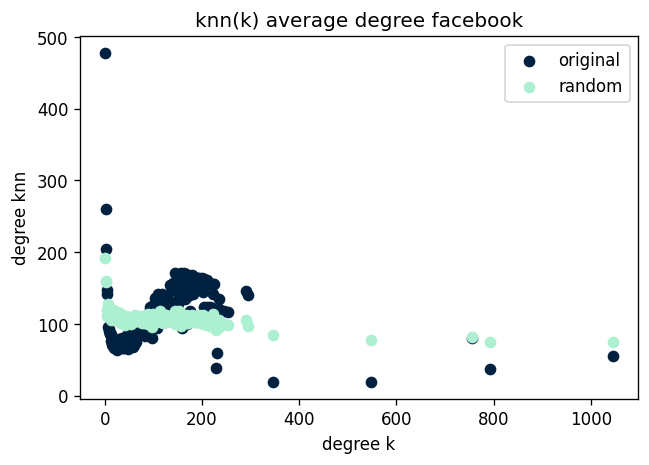


assortativity coefficient of the normal network: 0.06357722918564943
assortativity coefficient of the randomised network: -0.03469329042239886


#florentine

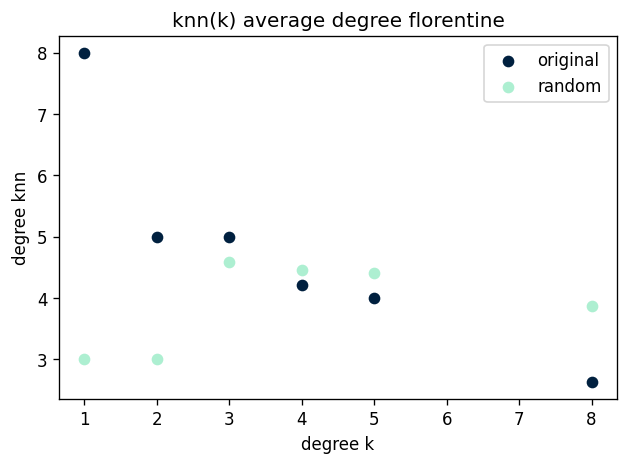


assortativity coefficient of the normal network: -0.47862867319679353
assortativity coefficient of the randomised network: -0.009795191451470196


#game

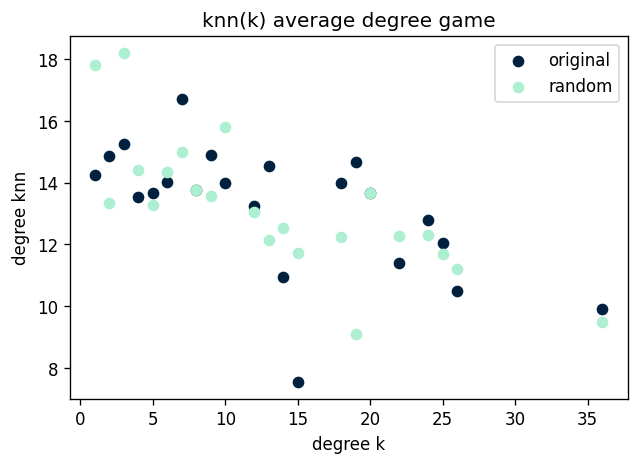


assortativity coefficient of the normal network: -0.1307696836693023
assortativity coefficient of the randomised network: -0.1632265736574731


#internet

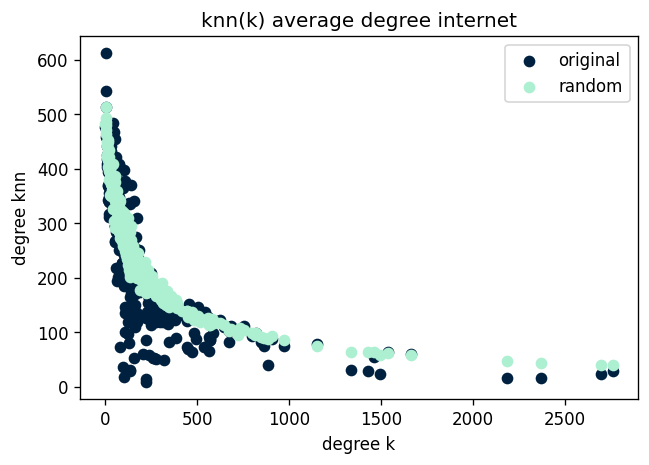


assortativity coefficient of the normal network: -0.21486656615730235
assortativity coefficient of the randomised network: -0.19778189898717918


#jazz

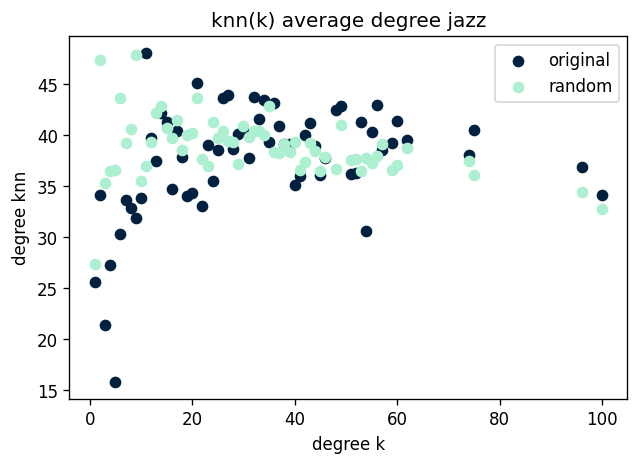


assortativity coefficient of the normal network: 0.020237399275047713
assortativity coefficient of the randomised network: -0.07266930692131228


#terrorists

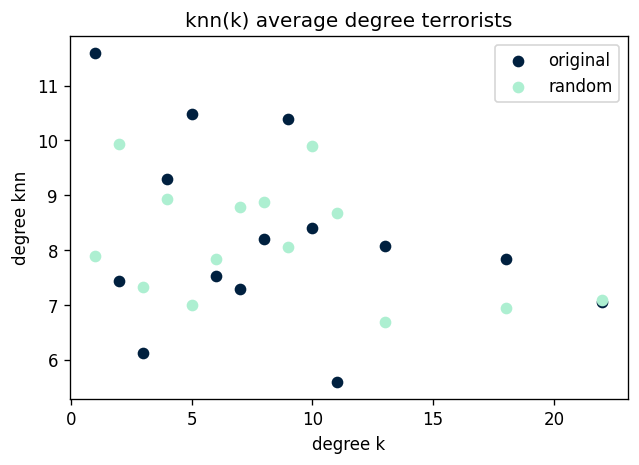


assortativity coefficient of the normal network: -0.08047566178575725
assortativity coefficient of the randomised network: -0.07177241971636257


In [ ]:
# To loop through the files
os.chdir("/content/drive/MyDrive/Colab Notebooks/Exercise_2/All")

past_normal = ""
past_graph = 0
for element in sorted(os.listdir()):
  if past_graph == 1:
    print(avg_degree_nn(nx.read_gml(past_normal),nx.read_gml(element), element))
    past_graph = 0
    continue
  else:
    past_normal = element
    past_graph = 1



# A02.2 Clustering and randomisation

 We wanted to evaluate the number of bins through the rice rule at the beginning but the bins turned out to small (https://en.wikipedia.org/wiki/Histogram#Number_of_bins_and_width).

  #bin = np.logspace(0,2,base=10,num = int(np.ceil((len(degrees)**(1/3))*2)))

In [36]:
from numpy.ma.core import log10
from networkx.algorithms.cluster import clustering
def degree_distribution_ll(normal: nx.Graph, name):
  plt.rcParams['figure.dpi'] = 120
  plt.rcParams['savefig.dpi'] = 120
  degrees = sorted([d for n, d in normal.degree()], reverse=True)
  avg_degree = (sum(degrees)/normal.number_of_nodes())
  
  bin = np.logspace(np.log10(min(degrees)),np.log10(max(degrees)+1),7)
  x = plt.hist(degrees, bins = bin, density = True, color="#00203FFF")

  plt.title("degree distribution " + re.split('_*_', name)[1])
  plt.xscale('log')
  plt.yscale('log')
  plt.xlabel("log degree")
  plt.ylabel("log occurences")
  plt.vlines(avg_degree,0,np.max(x[0]),color="red", label='avg degree')
  display(Markdown(f"#Histogram from {re.split('_*_', name)[1]}"))
  plt.legend()
  plt.show()
  
  ############# 2.2.2

def scatter_cc(normal: nx.Graph, randomized: nx.Graph, name):
  clustering_n = clustering(normal)
  clustering_r = clustering(randomized)
  #plt.scatter([int(x) for x in clustering_n.keys()], [int(x) for x in clustering_r.keys()] , color="#00203FFF")
  #plt.scatter([int(x) for x in clustering_r.keys()], clustering_r.values(), color="#ADEFD1FF", label="randomized Crnd(i)")
  plt.scatter(clustering_n.values(), clustering_r.values(), color="#00203FFF")
  plt.title("coefficients " + re.split('_*_', name)[1])
  plt.xlabel("C(i)")
  plt.ylabel("Crnd(i)")
  display(Markdown(f"#Scatter Plot C(i) vs. Crnd(i) from {re.split('_*_', name)[1]}"))
  plt.show()

#scatter_cc(terrorist_n,terrorist_r,"terrorist")

#Histogram from AstroPh

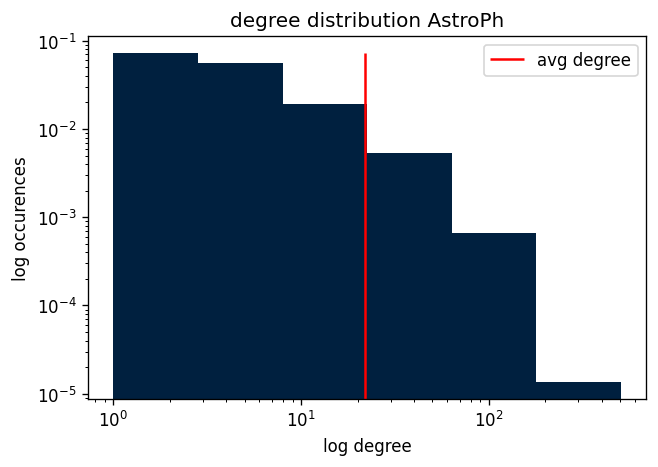

#Scatter Plot C(i) vs. Crnd(i) from AstroPh

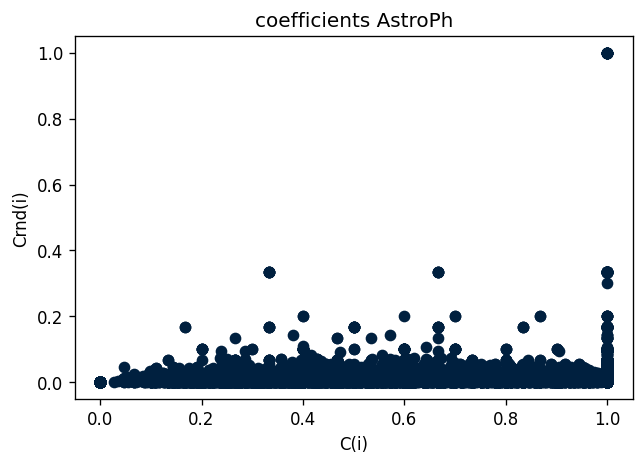

#Histogram from CondMat

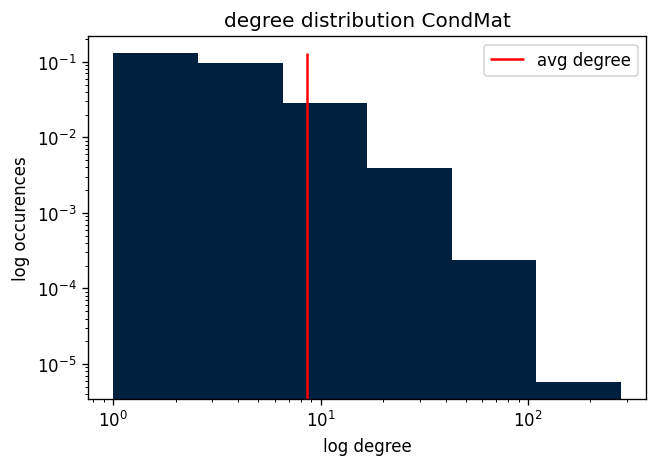

#Scatter Plot C(i) vs. Crnd(i) from CondMat

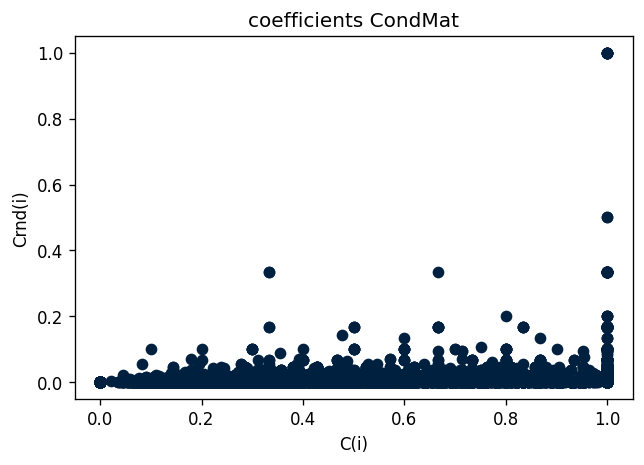

#Histogram from celegansInteractomes

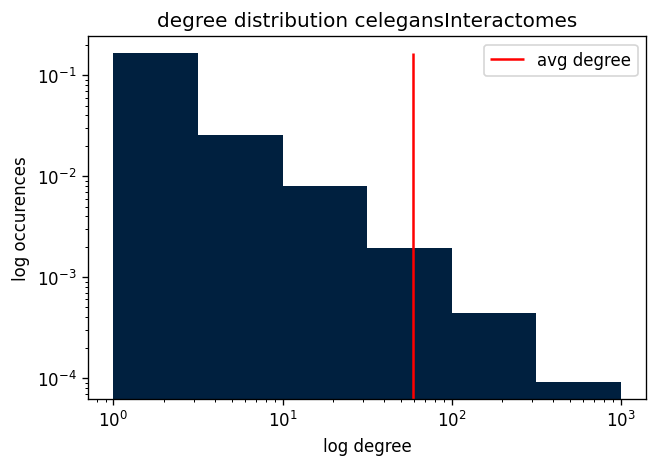

#Scatter Plot C(i) vs. Crnd(i) from celegansInteractomes

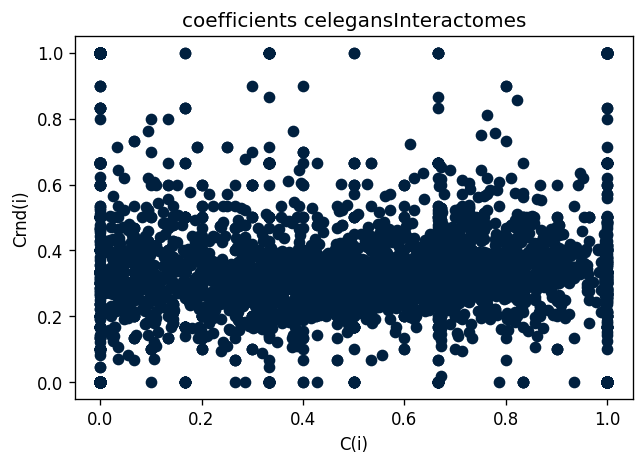

#Histogram from chess

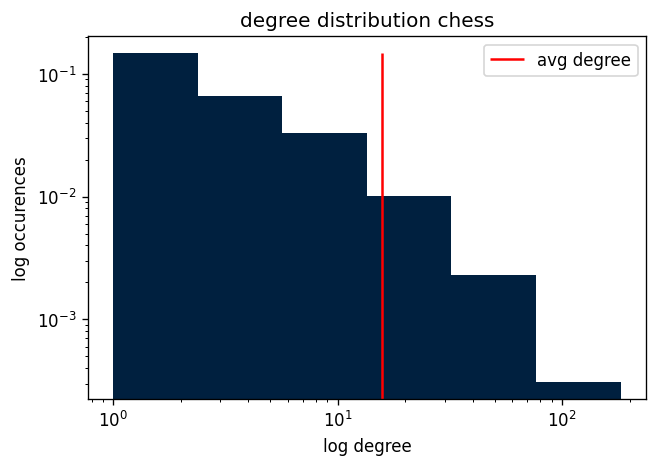

#Scatter Plot C(i) vs. Crnd(i) from chess

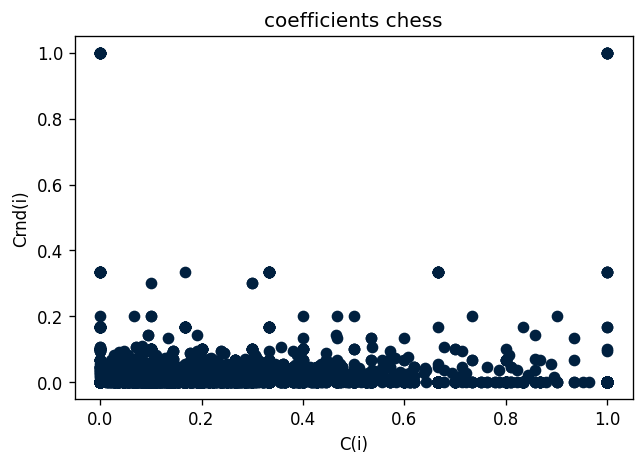

#Histogram from dolphins

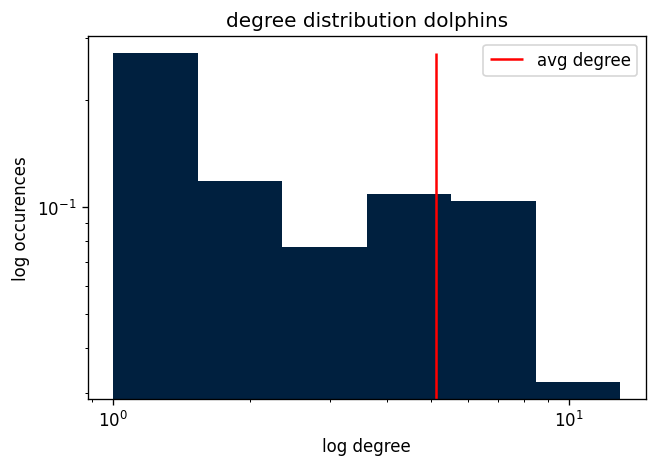

#Scatter Plot C(i) vs. Crnd(i) from dolphins

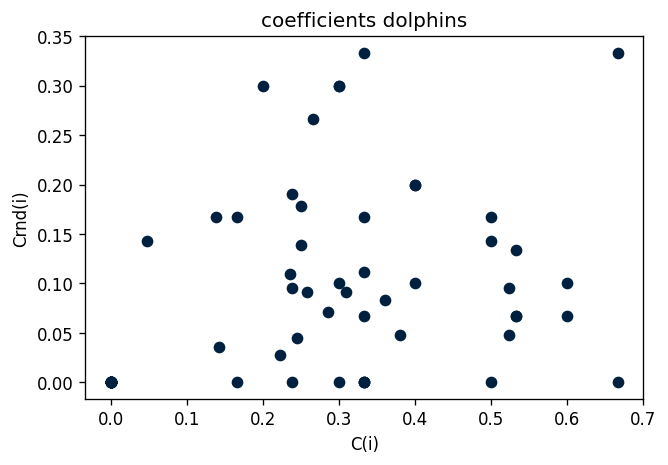

#Histogram from eu

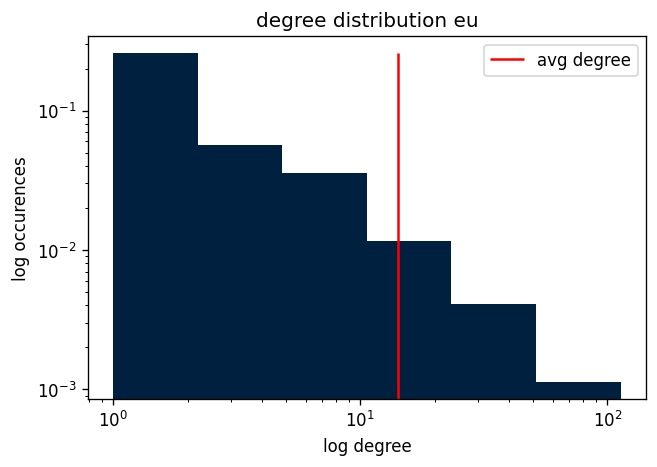

#Scatter Plot C(i) vs. Crnd(i) from eu

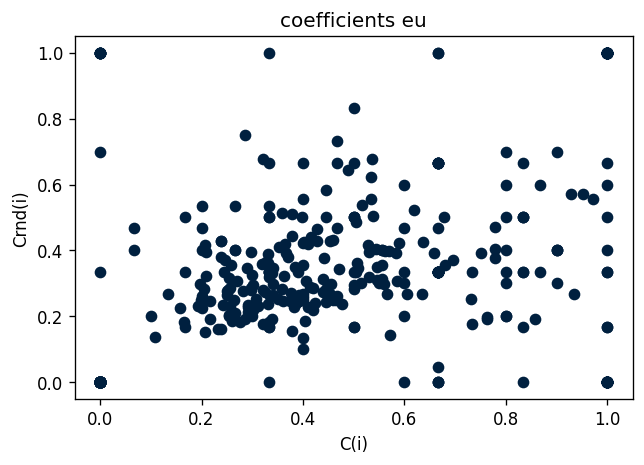

#Histogram from facebook

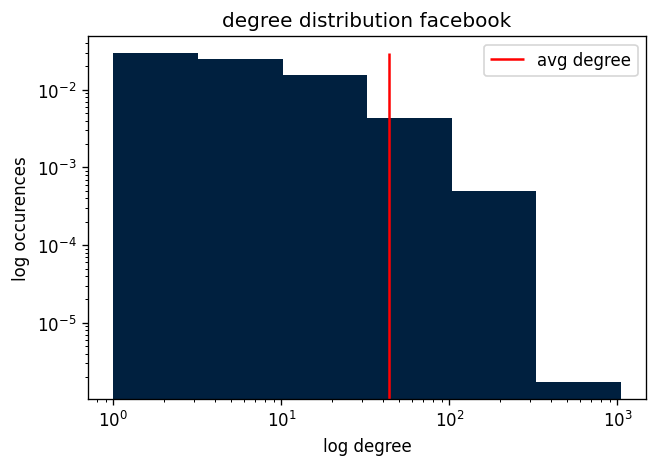

#Scatter Plot C(i) vs. Crnd(i) from facebook

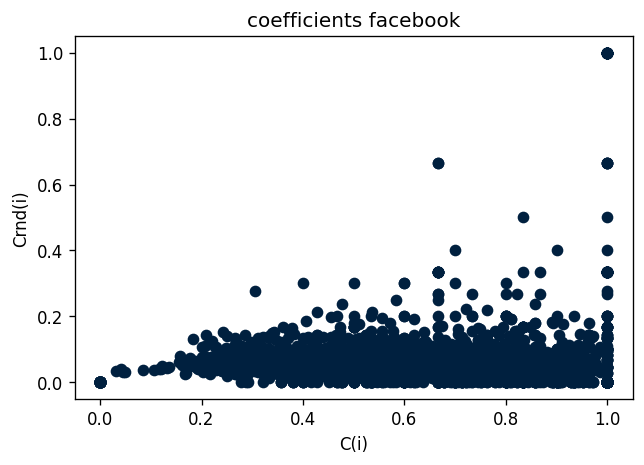

#Histogram from florentine

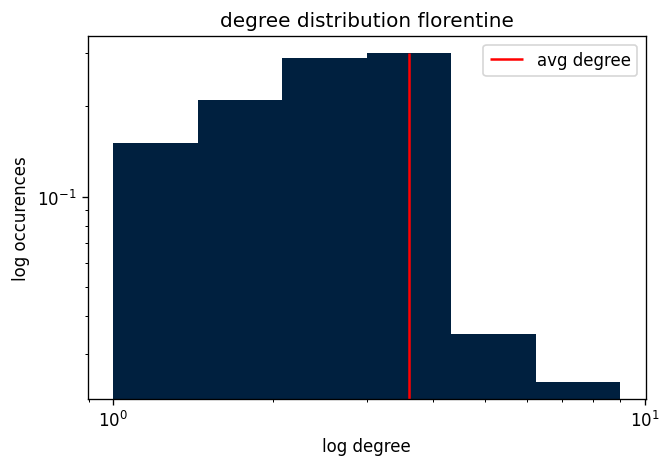

#Scatter Plot C(i) vs. Crnd(i) from florentine

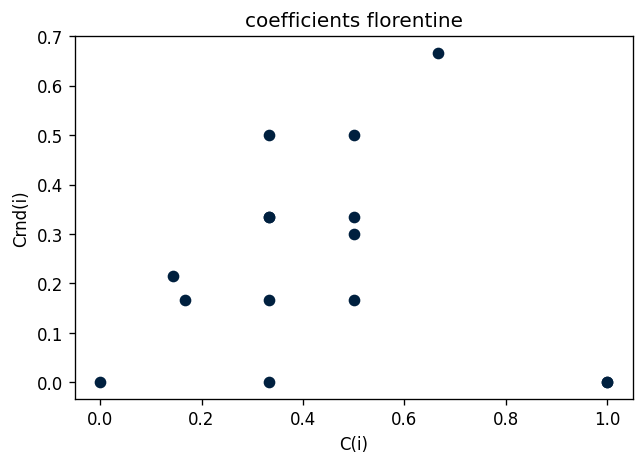

#Histogram from game

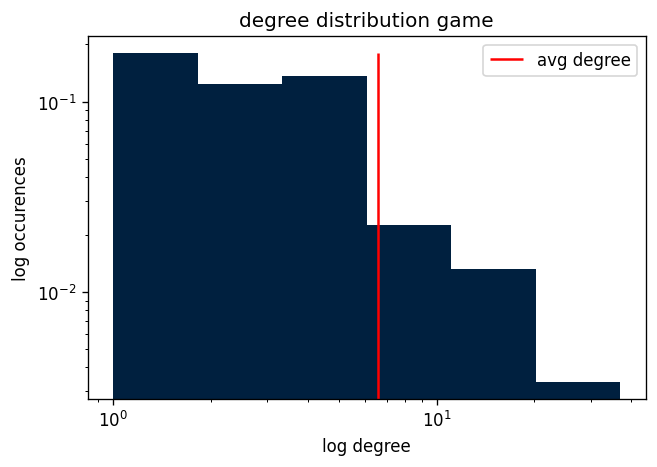

#Scatter Plot C(i) vs. Crnd(i) from game

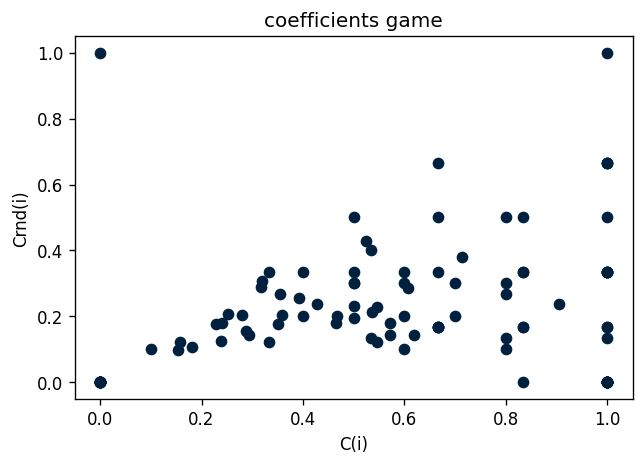

#Histogram from internet

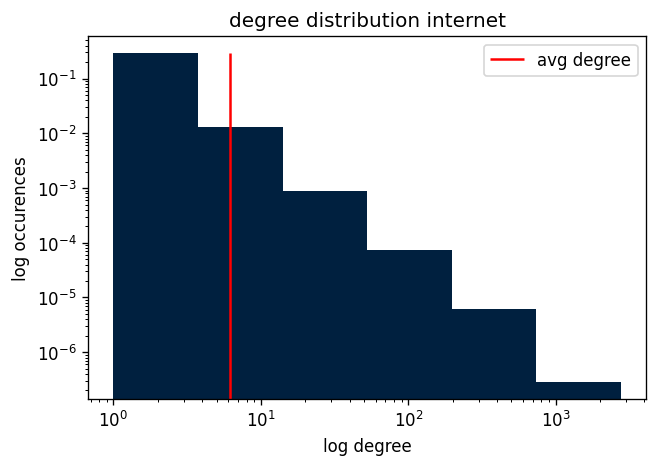

#Scatter Plot C(i) vs. Crnd(i) from internet

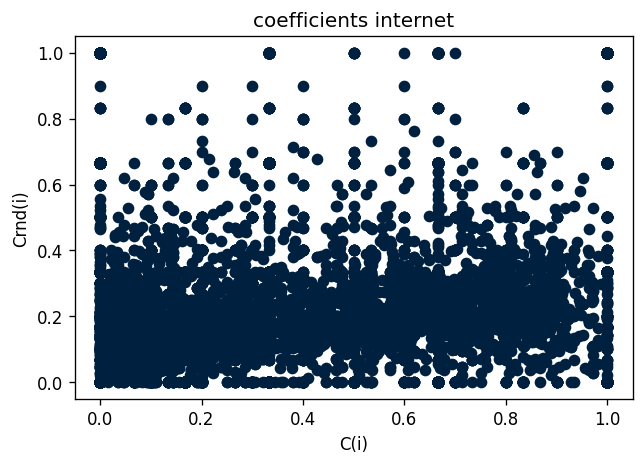

#Histogram from jazz

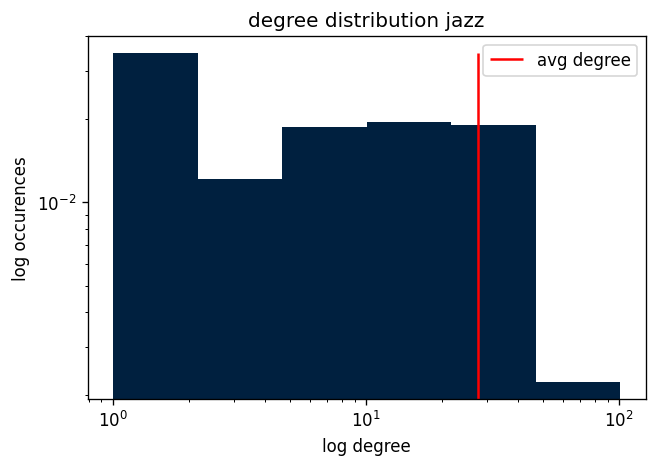

#Scatter Plot C(i) vs. Crnd(i) from jazz

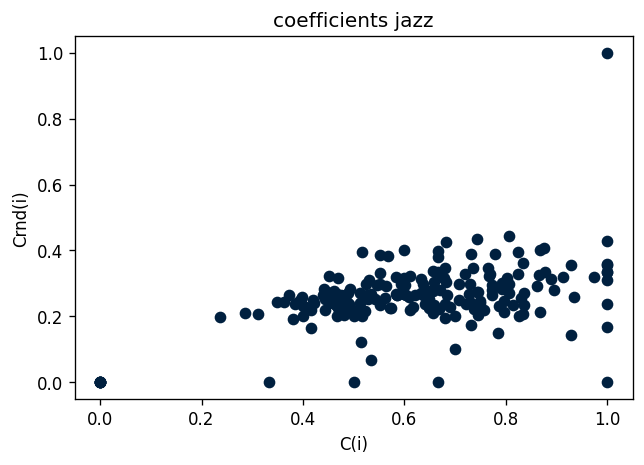

#Histogram from terrorists

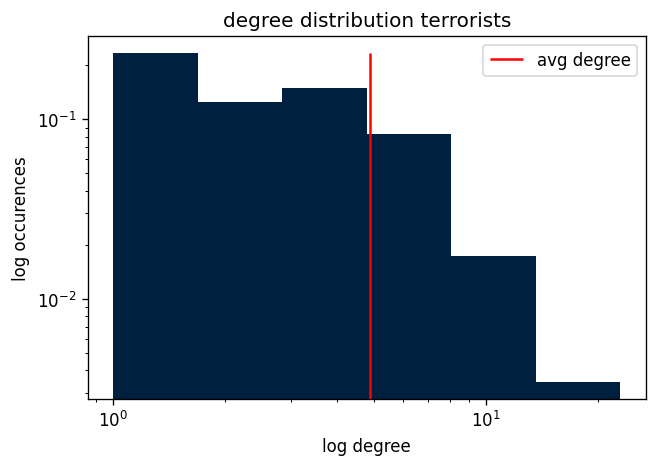

#Scatter Plot C(i) vs. Crnd(i) from terrorists

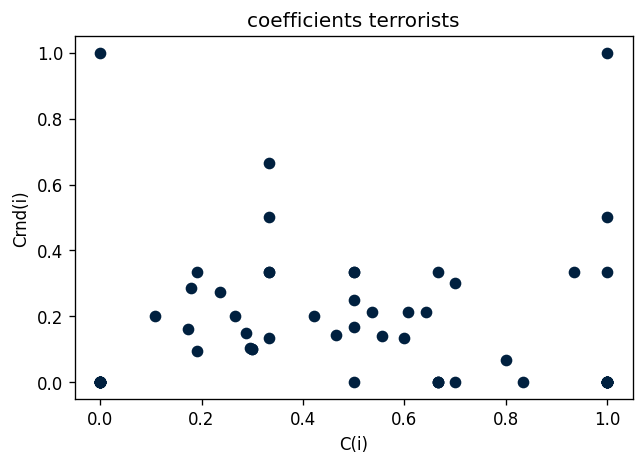

In [37]:
os.chdir("/content/drive/MyDrive/Colab Notebooks/Exercise_2/All")

past_normal = ""
past_graph = 0
for element in sorted(os.listdir()):
  if past_graph == 1:
    degree_distribution_ll(nx.read_gml(past_normal), element)
    scatter_cc(nx.read_gml(past_normal),nx.read_gml(element), element)
    past_graph = 0
    continue
  else:
    past_normal = element
    past_graph = 1
